# Description

It gets the PCA transformation of an input file.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import conf
from utils import generate_result_set_name

# Settings

## Input data

In [3]:
INPUT_FILEPATH_STEM = 'smultixcan-efo_partial-mashr-zscores'

In [4]:
INPUT_FILEPATH = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    'z_score_std',
    f'z_score_std-{INPUT_FILEPATH_STEM}.pkl',
).resolve()
display(INPUT_FILEPATH)

input_filepath_stem = INPUT_FILEPATH.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/z_score_std/z_score_std-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-smultixcan-efo_partial-mashr-zscores'

## Output folder

In [5]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    'pca'
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/pca')

## PCA options

In [6]:
# parameters of the dimentionality reduction steps
DR_OPTIONS = {
    'n_components': 50,
    'svd_solver': 'full',
    'random_state': 0,
}

In [7]:
# dictionary containing all options/settings (used to generate filenames)
ALL_OPTIONS = DR_OPTIONS.copy()

display(ALL_OPTIONS)

{'n_components': 50, 'svd_solver': 'full', 'random_state': 0}

# Load input file

In [8]:
data = pd.read_pickle(INPUT_FILEPATH)

In [9]:
display(data.shape)

(3749, 6452)

In [10]:
display(data.head())

gene_name,ENSG00000183087,ENSG00000157227,ENSG00000096696,ENSG00000175130,ENSG00000113140,ENSG00000117984,ENSG00000116016,ENSG00000129116,ENSG00000134686,ENSG00000108679,...,ENSG00000111716,ENSG00000166796,ENSG00000114331,ENSG00000131584,ENSG00000165410,ENSG00000172757,ENSG00000147862,ENSG00000008323,ENSG00000167083,ENSG00000149257
100001_raw-Food_weight,0.834672,-0.969366,-0.788966,-1.236243,-1.192910,-0.859681,-0.324518,0.880799,-0.152357,-1.109631,...,-0.847934,-1.246339,-1.225673,-0.270551,-0.251339,-0.348636,-0.283083,0.541040,0.412878,0.212180
100002_raw-Energy,-0.893351,-0.906648,-1.108427,-0.633443,-1.257057,-0.975325,0.100801,-0.814622,0.993700,0.709155,...,1.039015,-0.097355,0.613387,1.297104,-0.646984,-0.642464,0.254638,-0.235577,0.390156,0.875050
100003_raw-Protein,0.724878,0.367317,-1.100323,-1.304925,-0.735474,-1.178054,0.002718,-0.151997,0.730952,0.949561,...,0.668253,0.381954,0.883388,0.028914,-1.262583,-0.547308,-0.369882,0.725386,0.969339,0.582554
100004_raw-Fat,-0.273941,-1.113389,-1.176575,-0.461884,-0.947444,-0.213364,-0.169319,-1.092854,0.752200,1.207424,...,0.724525,-0.569374,0.590451,1.656459,-0.081229,-0.290437,0.928900,-0.661822,0.709848,0.600761
100005_raw-Carbohydrate,-0.925286,-0.186918,-0.488066,-0.682023,-0.746643,-0.262771,-0.261208,-0.513372,0.385347,-0.681057,...,0.692922,-0.029716,0.655211,1.326645,-0.897059,-0.569916,1.393707,-0.189605,-0.369507,0.257153


# PCA

In [11]:
from data.dimreduction import get_pca_proj

In [12]:
dr_data = get_pca_proj(data, DR_OPTIONS)

"PCA object: PCA(n_components=50, random_state=0, svd_solver='full')"

In [13]:
display(dr_data.shape)

(3749, 50)

In [14]:
display(dr_data.head())

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
100001_raw-Food_weight,-3.493215,-0.987150,1.492817,0.482035,-1.164444,0.050002,-0.411728,2.390498,1.765725,-0.896162,...,-3.024788,2.825589,-0.638548,-0.413415,-0.961899,-2.486188,0.529897,1.154922,3.402950,-0.126687
100002_raw-Energy,-4.440565,-0.508618,-0.304245,0.591788,-2.265994,-1.638334,-1.158587,1.578392,2.171806,-0.087999,...,-3.318181,6.042613,-5.283345,2.079885,-0.773600,0.731210,1.284297,0.321889,-2.528603,0.466368
100003_raw-Protein,-3.157358,-1.774830,-1.152871,1.268815,-0.823604,-0.550582,-0.783617,-0.249384,0.599203,0.705892,...,-0.762616,3.256450,-1.076204,2.032292,-0.153910,-0.640978,-0.100715,-1.188939,-1.386505,0.828689
100004_raw-Fat,-5.360858,0.448639,-0.141721,0.918213,-0.706888,-1.685522,0.600232,2.045875,1.589926,0.414214,...,-0.904615,2.387056,-2.364230,0.707589,-1.812605,1.645105,1.853850,-2.124962,-3.696322,-2.100714
100005_raw-Carbohydrate,-5.568020,0.399839,0.725194,0.004336,-2.251612,-1.041359,-1.348013,1.063241,2.010053,-0.532902,...,-3.680299,5.241352,-5.712520,1.998522,1.427312,-0.181416,0.137243,1.337703,-0.844380,0.376784


## Plot

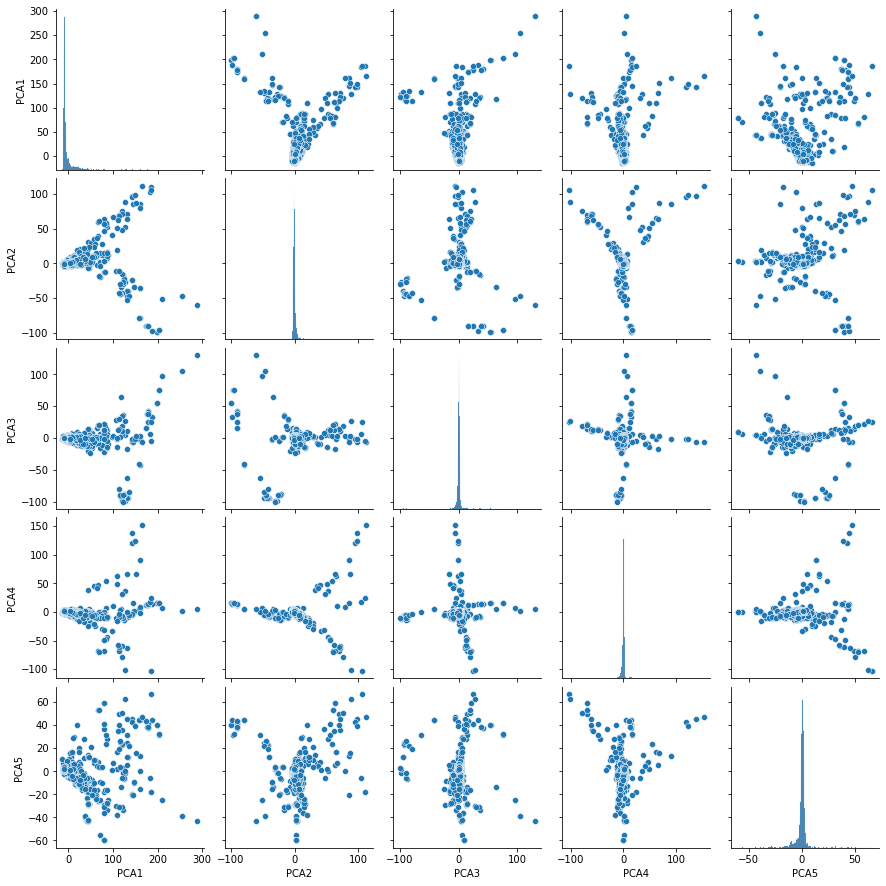

In [15]:
g = sns.pairplot(data=dr_data.iloc[:,:5])

# Save

In [16]:
output_file = Path(
    RESULTS_DIR,
    generate_result_set_name(
        ALL_OPTIONS,
        prefix=f'pca-{input_filepath_stem}-',
        suffix='.pkl'
    )
).resolve()

display(output_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/pca/pca-z_score_std-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full.pkl')

In [17]:
dr_data.to_pickle(output_file)